# Investigating Morten's Mon R2 file

On June 6, Morten sent a data file with the following description:

> "I've attached a file that has the HST photometry
for all sources, whether it is consistent with having a circumstellar
disk, the extinction, and the mass estimated.
A few caveats: I ran the extinction and mass determination on the
whole list with no restrictions. so until extinction cuts etc are made
the samples will differ. Also, masses close to 1.4 Msun or very low
mass brown dwarfs are limits since the closest mass on the isochrone
in terms of J band magnitude is used for the excess sources and the
weighted average for the two closest points for the non-excess sample."

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.table

from astropy.coordinates import SkyCoord
from astropy import units as u

In [3]:
location = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/MonR2"

In [4]:
filepath = os.path.join(location, "MortenAndersen/phot_ruby_edited.dat")
filepath_published = os.path.join(location, "Andersen_2006AJ_132_2296A_table2.fit")

monr2_table_raw = astropy.table.Table.read(
    filepath, format='ascii', header_start=0, data_start=1
)

too_faint = (monr2_table_raw['eF110W']>10)
# Here, we remove about six rows from the table. 
# - One for a star with enormous photometric errors (row 34)
# - Five for apparent duplicates at the end of the table
monr2_table = monr2_table_raw[~too_faint][:181]

monr2_published_table = astropy.table.Table.read(filepath_published)


In [5]:
monr2_published_table.show_in_notebook()

idx,__AMO2006_,RAJ2000,DEJ2000,F110W,e_F110W,F160W,e_F160W,F165M,e_F165M,F207M,e_F207M,_2MASS
,,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,
0,1,91.93742,-6.39050,23.11,0.51,17.32,0.050,17.10,0.05,14.47,0.06,06074492-0623257
1,2,91.94012,-6.39031,24.55,1.21,19.77,0.070,19.41,0.07,17.07,0.07,
2,3,91.93287,-6.39078,18.58,0.03,16.20,0.040,15.90,0.04,15.48,0.06,
3,4,91.93675,-6.39050,17.34,0.03,14.77,0.030,14.55,0.03,13.89,0.05,06074483-0623260
4,5,91.93442,-6.39042,16.12,0.04,13.81,0.040,13.58,0.04,13.04,0.06,06074426-0623256
5,6,91.94862,-6.38944,20.17,0.04,18.45,0.040,18.15,0.04,17.90,0.08,
6,7,91.94200,-6.38939,18.62,0.03,15.92,0.030,15.68,0.03,15.01,0.05,
7,8,91.93742,-6.38942,21.13,0.05,17.56,0.030,17.29,0.03,16.17,0.05,
8,9,91.94679,-6.38856,20.88,0.05,18.74,0.040,18.51,0.04,18.03,0.08,


In [6]:
monr2_table.show_in_notebook()

idx,F110W,eF110W,F160W,eF160W,F207M,eF207M,F165M,eF165M,Av,excess,mass
0,23.11,0.507,17.318,0.045,14.467,0.064,17.102,0.045,-269.637,1.0,0.006
1,24.548,1.214,19.771,0.068,17.066,0.071,19.407,0.072,-303.211,1.0,0.006
2,18.581,0.039,16.197,0.039,15.479,0.064,15.895,0.039,10.3965,0.0,0.126227
3,17.343,0.027,14.774,0.028,13.888,0.045,14.549,0.028,12.0533,0.0,0.548328
4,16.121,0.038,13.813,0.039,13.041,0.064,13.584,0.039,9.39457,0.0,0.775895
5,20.172,0.043,18.454,0.041,17.895,0.081,18.152,0.041,1.41963,1.0,0.012
6,18.619,0.027,15.922,0.028,15.014,0.045,15.678,0.028,13.5611,0.0,0.234454
7,21.131,0.047,17.563,0.028,16.174,0.046,17.286,0.029,22.1018,0.0,0.202609
8,20.88,0.05,18.743,0.043,18.025,0.08,18.512,0.044,6.07275,1.0,0.02
9,17.75,0.038,14.955,0.039,13.629,0.064,14.671,0.039,12.4653,1.0,0.4


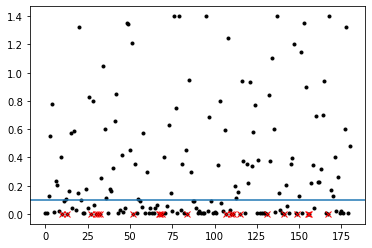

In [7]:
plt.plot(monr2_table['mass'], 'k.')
plt.axhline(0.10)
plt.plot(np.arange(len(monr2_table['mass']))[monr2_table['mass'] == 0], monr2_table['mass'][monr2_table['mass'] == 0], 'rx')


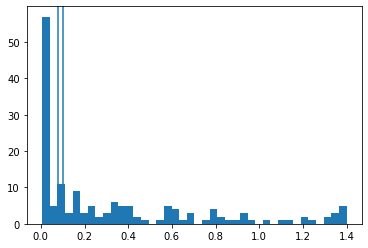

In [8]:
plt.hist(monr2_table['mass'][monr2_table['mass']>0], bins=40)
plt.axvline(0.08)
plt.axvline(0.10)

In [20]:
np.min(monr2_table['mass'][monr2_table['mass']>0])

0.006

In [9]:
mass = monr2_table['mass']

number_of_bds = np.sum((mass > 0) & (mass <= 0.10))

print(f"Number of BDs (naively estimated): {number_of_bds}")

Number of BDs (naively estimated): 69


(11.654500198364257, 26.73549919128418)

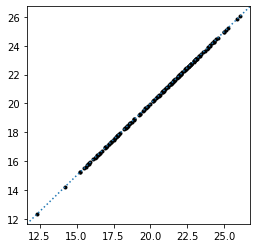

In [10]:
# Let's confirm that each and every row of the published table
# matches each and every row of the custom table.

fig, ax = plt.subplots(1, figsize=(4,4))
ax.plot(monr2_table['F110W'], monr2_published_table['F110W'], 'k.')
xlims = ax.get_xlim()
ylims = ax.get_ylim()

ax.plot([0,50], [0,50], ':')

ax.set_xlim(xlims)
ax.set_ylim(ylims)


In [11]:
for i, (x, y) in enumerate(zip(monr2_table['F110W'], monr2_published_table['F110W'])):
    print(f"{i:3d}:  {x:2.2f}  {y:2.2f}  {x-y:2.2f}")

  0:  23.11  23.11  -0.00
  1:  24.55  24.55  -0.00
  2:  18.58  18.58  0.00
  3:  17.34  17.34  0.00
  4:  16.12  16.12  0.00
  5:  20.17  20.17  0.00
  6:  18.62  18.62  -0.00
  7:  21.13  21.13  0.00
  8:  20.88  20.88  0.00
  9:  17.75  17.75  0.00
 10:  15.51  15.51  0.00
 11:  21.76  21.76  0.00
 12:  18.61  18.62  -0.01
 13:  15.26  15.26  0.00
 14:  18.91  18.91  -0.00
 15:  17.00  17.00  -0.00
 16:  21.25  21.25  0.00
 17:  16.32  16.32  -0.00
 18:  22.56  22.56  -0.00
 19:  18.43  18.43  -0.00
 20:  22.75  22.75  -0.00
 21:  18.46  18.46  0.00
 22:  -1.00  nan  nan
 23:  -1.00  nan  nan
 24:  16.98  16.98  -0.00
 25:  21.33  21.33  -0.00
 26:  15.84  15.84  0.00
 27:  16.95  16.95  0.00
 28:  20.55  20.55  0.00
 29:  21.62  21.62  -0.00
 30:  24.16  24.16  0.00
 31:  21.38  21.38  -0.00
 32:  -1.00  nan  nan
 33:  20.83  20.83  0.00
 34:  20.79  20.79  -0.00
 35:  20.79  20.79  -0.00
 36:  21.37  21.37  -0.00
 37:  -1.00  nan  nan
 38:  16.73  16.73  0.00
 39:  19.51  19.51  

In [24]:
monr2_table['eF110W'][monr2_table['eF110W']>10]

<Column name='eF110W' dtype='float64' length=0>

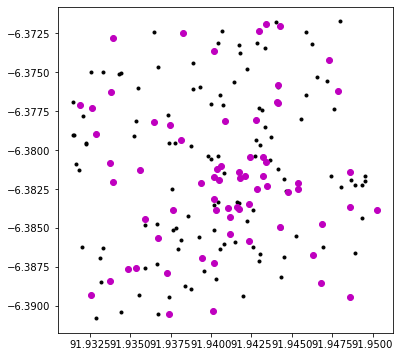

In [12]:
fig, ax = plt.subplots(1, figsize=(6,6))

ax.plot(
    monr2_published_table["RAJ2000"], 
    monr2_published_table["DEJ2000"], 
    'k.')

bds = ((mass > 0) & (mass <= 0.10))

ax.plot(
    monr2_published_table["RAJ2000"][bds], 
    monr2_published_table["DEJ2000"][bds], 
    'mo')


# A quick note on the above map

The objects in the above plot are scattered across an EXTREMELY small region: less than 0.02 degrees across (i.e., spanning the central ~2% of our field by width). So... this may not be that great.

Text(0, 0.5, 'm_F110W')

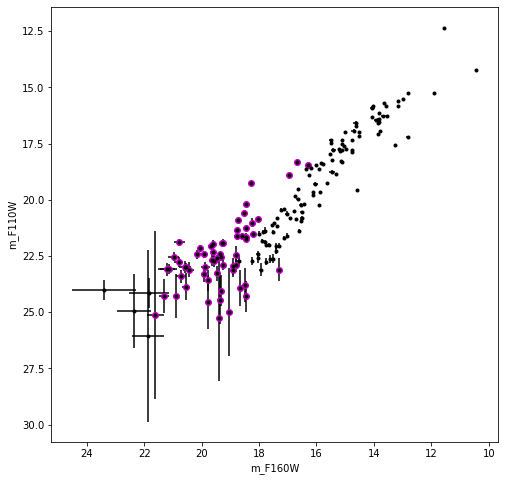

In [13]:
fig, ax = plt.subplots(1, figsize=(8,8))

ax.errorbar(
    monr2_published_table["F160W"], 
    monr2_published_table["F110W"], 
    xerr=monr2_published_table["e_F160W"],
    yerr=monr2_published_table["e_F110W"],
    fmt='k.')

# bds = ((mass > 0) & (mass <= 0.08))

ax.plot(
    monr2_published_table["F160W"][bds], 
    monr2_published_table["F110W"][bds], 
    'mo')

ax.invert_xaxis()
ax.invert_yaxis()

ax.set_xlabel("m_F160W")
ax.set_ylabel("m_F110W")


Text(0.5, 1.0, 'Reproduction of Figure 2, Andersen+06')

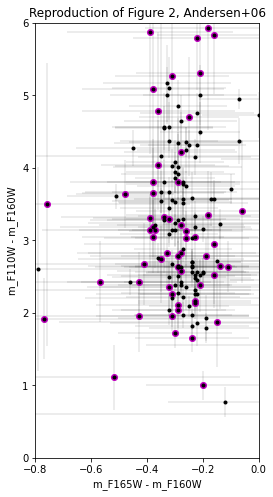

In [14]:
fig, ax = plt.subplots(1, figsize=(4,8))

tab = monr2_published_table

ax.errorbar(
    tab["F165M"] - tab["F160W"], 
    tab["F110W"] - tab["F160W"], 
    xerr=(tab["e_F165M"] + tab["e_F160W"]**2)**0.5,
    yerr=(tab["e_F110W"] + tab["e_F160W"]**2)**0.5,
    fmt='k.',
    elinewidth=0.15
    )

# bds = ((mass > 0) & (mass <= 0.08))

ax.plot(
    (tab["F165M"] - tab["F160W"])[bds], 
    (tab["F110W"] - tab["F160W"])[bds], 
    'mo')

ax.set_xlabel("m_F165W - m_F160W")
ax.set_ylabel("m_F110W - m_F160W")

ax.set_xlim(-0.8, 0)
ax.set_ylim(0, 6)
ax.set_title("Reproduction of Figure 2, Andersen+06")


Text(0.5, 1.0, '~Reproduction of Figure 4, Andersen+06')

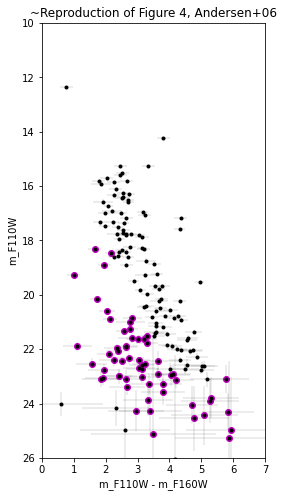

In [15]:
fig, ax = plt.subplots(1, figsize=(4,8))

tab = monr2_published_table

ax.errorbar(
    tab["F110W"] - tab["F160W"], 
    tab["F110W"],
    xerr=(tab["e_F110W"] + tab["e_F160W"]**2)**0.5,
    yerr=tab["e_F110W"],
    fmt='k.',
    elinewidth=0.15
    )

# bds = ((mass > 0) & (mass <= 0.08))

ax.plot(
    (tab["F110W"] - tab["F160W"])[bds], 
    tab["F110W"][bds],
    'mo')

# ax.invert_xaxis()
ax.invert_yaxis()

ax.set_ylabel("m_F110W")
ax.set_xlabel("m_F110W - m_F160W")

ax.set_xlim(0, 7)
ax.set_ylim(26, 10)
ax.set_title("~Reproduction of Figure 4, Andersen+06")


# Some thoughts on what to do next -

I'll want to see which of the "purple" sources matches to sources in our own data with good photometry. Are they too faint to be useful?

It seems that (in Figure 4) there are *really* not many objects in this CMD with J magnitudes above 17-18.
BUT! Tom, we should remember: we have H and K mags, and these objects are likely (on average) to be notably brighter in those bandpasses. So, don't lose hope.

I'll want to consider dealing with photometric errors in the Andersen data. I could consider a couple of things:
(a) restrict my selection to only objects with errors below 0.06 mag, as Andersen does in Figure 2;
(b) make a cut at the 90% completeness limit, like Andersen notes in Figure 4 - 

In [16]:
from wuvars.data import spreadsheet, photometry
from wuvars.plotting.lightcurve import simple_lc

spread = spreadsheet.load_wserv_v2(11)
dat = photometry.group_wserv_v2(photometry.load_wserv_v2(11))


Loading WSERV11 photometry data... DONE (elapsed time: 0.72s)


In [17]:
w11m = spread['median']
spreadsheet_coordinates = SkyCoord(ra=w11m['RA'].values*u.rad, dec=w11m['DEC'].values*u.rad)


In [18]:
table_coordinates = SkyCoord(ra=tab['RAJ2000'][bds], dec=tab['DEJ2000'][bds])
len(table_coordinates)

69

In [19]:
idx, d2d, d3d = table_coordinates.match_to_catalog_sky(spreadsheet_coordinates)


Text(0, 0.5, 'Number')

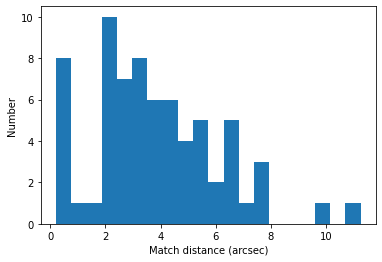

In [20]:
plt.hist(d2d.to(u.arcsec).value, bins=20)
plt.xlabel("Match distance (arcsec)")
plt.ylabel("Number")

In [21]:
max_sep = 0.38 * u.arcsec

sep_constraint = (d2d < max_sep)
print(idx[sep_constraint])
print(len(idx[sep_constraint]))
print(np.sum(sep_constraint))

[21857 21849 21837 21837  7061  7364]
6
6


Text(0, 0.5, 'Number')

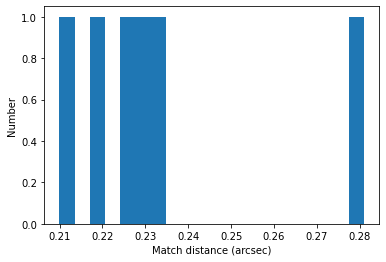

In [22]:
plt.hist(d2d[sep_constraint].to(u.arcsec).value, bins=20)
plt.xlabel("Match distance (arcsec)")
plt.ylabel("Number")

In [23]:
matches = w11m.iloc[idx[sep_constraint]]
# matches['Teff'] = joined[confident_bds][sep_constraint]['Teff']
# matches['Robberto_index'] = joined[confident_bds][sep_constraint]['index']

matched_bds = tab[bds][sep_constraint]
matched_bds['Av'] = monr2_table['Av'][bds][sep_constraint]
matched_bds['mass'] = monr2_table['mass'][bds][sep_constraint]

matches

,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,HAPERMAG3,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
SOURCEID,,,,,,,,,,,,,,,,,,,,,
45195940889196,57497.231408,1.604660,-0.111480,1.992078,0.028302,1.963661,0.022048,16.521488,0.018721,14.495844,...,12.600867,0.009649,16.0,16.0,16.0,1.0,0.003067,0.983364,0.973717,0.969005
45195940889188,57496.232847,1.604836,-0.111420,1.577335,0.026362,1.950851,0.022003,16.133999,0.016359,14.547314,...,12.572742,0.009657,16.0,16.0,16.0,1.0,0.003067,0.981447,0.971393,0.967374
45195940889176,57496.232847,1.604728,-0.111299,3.484060,0.025983,2.773288,0.021096,16.179478,0.016665,12.692120,...,9.922578,0.009320,16.0,16.0,16.0,1.0,0.003067,0.981343,0.968274,0.966292
45195940889176,57496.232847,1.604728,-0.111299,3.484060,0.025983,2.773288,0.021096,16.179478,0.016665,12.692120,...,9.922578,0.009320,16.0,16.0,16.0,1.0,0.003067,0.981343,0.968274,0.966292
45195940866214,57468.243125,1.604784,-0.111252,1.006721,0.047225,NaN,NaN,17.196529,0.036748,16.493586,...,NaN,NaN,0.0,0.0,NaN,1.0,0.050000,0.971878,0.962517,0.967020
45195940867360,57678.489662,1.604715,-0.111212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.050000,0.988808,0.977752,0.974979


In [24]:
matched_bds

__AMO2006_,RAJ2000,DEJ2000,F110W,e_F110W,F160W,e_F160W,F165M,e_F165M,F207M,e_F207M,_2MASS,Av,mass
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,,,
int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes17,float64,float64
22,91.94021,-6.38725,18.46,0.04,16.29,0.040,16.06,0.04,15.71,0.07,,8.14569,0.0963702
55,91.95029,-6.38386,23.92,0.81,18.65,0.040,18.34,0.04,16.13,0.05,06074807-0623017,-287.151,0.006
137,91.94412,-6.37700,22.06,0.12,19.68,0.100,19.47,0.11,18.05,0.12,,6.68467,0.012
141,91.94408,-6.37689,22.16,0.14,20.05,0.080,19.76,0.08,18.40,0.08,06074658-0622370,3.36544,0.006
160,91.94729,-6.37422,18.33,0.04,16.67,0.040,16.43,0.04,16.25,0.07,,1.18286,0.04
180,91.94337,-6.37189,23.79,0.76,18.48,0.050,18.27,0.05,16.28,0.07,,-284.166,0.006


Text(0.5, 1.0, "This plot shows that our catalog cross-matches DON'T have\nsimilar magnitudes in HST and UKIRT.")

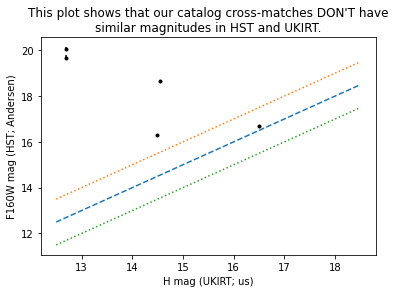

In [25]:
plt.errorbar(
    matches['HAPERMAG3'], 
    matched_bds['F160W'], 
    xerr=matches['HAPERMAG3ERR'], 
    yerr=matched_bds['e_F160W'], 
    fmt='k.')


plt.plot([12.5, 18.5], [12.5, 18.5], '--')
plt.plot([12.5, 18.5], [12.5+1, 18.5+1], ':')
plt.plot([12.5, 18.5], [12.5-1, 18.5-1], ':')

plt.xlabel("H mag (UKIRT; us)")
plt.ylabel("F160W mag (HST; Andersen)")

plt.title("This plot shows that our catalog cross-matches DON'T have\nsimilar magnitudes in HST and UKIRT.")


# Notes 

What the above indicates to me is that *none* of the brown dwarfs in Morten's data even match to an appropriate companion in our data. Are they not detected? Are the coordinates misaligned by enough that the matches are failing? What's happening here? I'm going to try cross-matching *all* sources, not just BDs, and see what happens.

In [26]:
table_coordinates2 = SkyCoord(ra=tab['RAJ2000'], dec=tab['DEJ2000'])
len(table_coordinates2)

181

In [27]:
idx2, d2d2, d3d2 = table_coordinates2.match_to_catalog_sky(spreadsheet_coordinates)


Text(0, 0.5, 'Number')

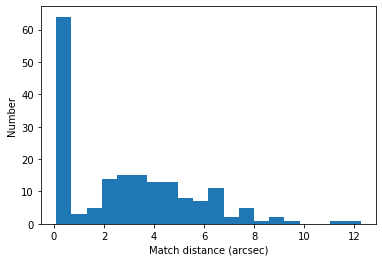

In [28]:
plt.hist(d2d2.to(u.arcsec).value, bins=20)
plt.xlabel("Match distance (arcsec)")
plt.ylabel("Number")

In [29]:
max_sep = 0.38 * u.arcsec

sep_constraint2 = (d2d2 < max_sep)
print(idx2[sep_constraint2])
print(len(idx2[sep_constraint2]))
print(np.sum(sep_constraint2))

[21865 21864 21863 21861 21859 21860 21858 23531 21857 21854 21855 21856
 23536 23528 21852 21853 23535 23529 21850 21872 21849 21848 21847 21875
 23526 23524 23525 21874 21843 21842 21842 21841 23523 23523 23522 21839
 21837 21840 21837 23521 21836 23519 21835 21833 21833  7061 21834 21832
 21873 21830 21828  7363 21829 21827  5398 21471  7364 21826]
58
58


Text(0, 0.5, 'Number')

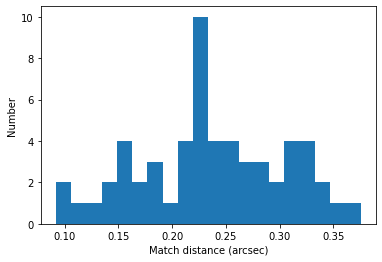

In [30]:
plt.hist(d2d2[sep_constraint2].to(u.arcsec).value, bins=20)
plt.xlabel("Match distance (arcsec)")
plt.ylabel("Number")

In [31]:
matches2 = w11m.iloc[idx2[sep_constraint2]]
# matches['Teff'] = joined[confident_bds][sep_constraint]['Teff']
# matches['Robberto_index'] = joined[confident_bds][sep_constraint]['index']

matched2 = tab[sep_constraint2]
matched2['Av'] = monr2_table['Av'][sep_constraint2]
matched2['mass'] = monr2_table['mass'][sep_constraint2]

matches2

,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,HAPERMAG3,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
SOURCEID,,,,,,,,,,,,,,,,,,,,,
45195940889204,57497.231408,1.604599,-0.111536,1.986847,0.027254,1.353102,0.021840,16.293415,0.017850,14.321848,...,12.962009,0.009801,16.0,16.0,16.0,1.0,0.000171,0.981413,0.969427,0.967374
45195940889203,57495.734358,1.604559,-0.111535,1.649997,0.022974,1.176138,0.021426,15.331441,0.012214,13.684780,...,12.514733,0.009599,0.0,16.0,16.0,1.0,0.003067,0.981343,0.968648,0.966833
45195940889202,57498.741101,1.604579,-0.111515,2.040699,0.028291,1.367171,0.021898,16.358921,0.018902,14.327280,...,12.972246,0.009818,16.0,16.0,16.0,1.0,0.000171,0.982297,0.971912,0.967558
45195940889200,57496.232847,1.604636,-0.111509,1.850013,0.021799,1.135585,0.021151,14.572273,0.010533,12.728291,...,11.588305,0.009409,16.0,16.0,16.0,1.0,0.000171,0.981343,0.968274,0.966292
45195940889198,57496.232847,1.604732,-0.111495,1.903967,0.021767,1.270034,0.021127,14.490267,0.010477,12.614728,...,11.332956,0.009382,16.0,16.0,16.0,1.0,0.000171,0.981343,0.968274,0.966292
45195940889199,57497.731140,1.604537,-0.111500,1.870039,0.026277,1.129925,0.021870,16.132759,0.016431,14.259776,...,13.141289,0.009910,16.0,16.0,16.0,1.0,0.003067,0.981378,0.969224,0.966833
45195940889197,57495.734358,1.604648,-0.111489,1.749105,0.022880,1.317646,0.021366,15.299454,0.012069,13.552774,...,12.232843,0.009542,16.0,16.0,16.0,1.0,0.000171,0.981343,0.968648,0.966833
45195940891324,57493.738710,1.604708,-0.111478,1.875519,0.030640,NaN,NaN,16.679640,0.021260,14.818075,...,NaN,NaN,16.0,16.0,NaN,1.0,0.003067,0.985089,0.976456,0.969030
45195940889196,57497.231408,1.604660,-0.111480,1.992078,0.028302,1.963661,0.022048,16.521488,0.018721,14.495844,...,12.600867,0.009649,16.0,16.0,16.0,1.0,0.003067,0.983364,0.973717,0.969005


In [32]:
matched2

__AMO2006_,RAJ2000,DEJ2000,F110W,e_F110W,F160W,e_F160W,F165M,e_F165M,F207M,e_F207M,_2MASS,Av,mass
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,,,
int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes17,float64,float64
4,91.93675,-6.39050,17.34,0.03,14.77,0.030,14.55,0.03,13.89,0.05,06074483-0623260,12.0533,0.548328
5,91.93442,-6.39042,16.12,0.04,13.81,0.040,13.58,0.04,13.04,0.06,06074426-0623256,9.39457,0.775895
10,91.93554,-6.38928,17.75,0.04,14.96,0.040,14.67,0.04,13.63,0.06,06074454-0623214,12.4653,0.4
11,91.93879,-6.38894,15.51,0.04,12.99,0.040,12.76,0.04,12.13,0.06,06074531-0623202,0.0,0.0
14,91.94433,-6.38814,15.26,0.04,12.80,0.040,12.90,0.04,12.09,0.06,06074665-0623175,0.0,0.0
16,91.93317,-6.38847,17.00,0.04,14.52,0.040,14.29,0.04,13.71,0.06,06074396-0623184,10.9992,0.575852
18,91.93954,-6.38778,16.32,0.04,14.06,0.040,13.84,0.04,13.43,0.06,06074549-0623160,8.64278,0.583945
20,91.94296,-6.38714,18.43,0.04,16.00,0.040,15.72,0.04,15.21,0.07,06074631-0623128,11.0428,0.150121


Text(0, 0.5, 'F160W mag (HST; Andersen)')

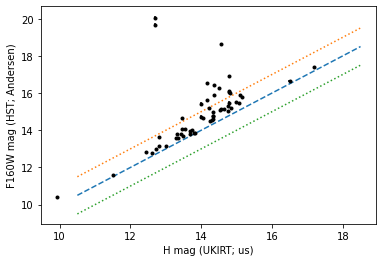

In [33]:
plt.errorbar(
    matches2['HAPERMAG3'], 
    matched2['F160W'], 
    xerr=matches2['JAPERMAG3ERR'], 
    yerr=matched2['e_F160W'], 
    fmt='k.')


plt.plot([10.5, 18.5], [10.5, 18.5], '--')
plt.plot([10.5, 18.5], [10.5+1, 18.5+1], ':')
plt.plot([10.5, 18.5], [10.5-1, 18.5-1], ':')

plt.xlabel("H mag (UKIRT; us)")
plt.ylabel("F160W mag (HST; Andersen)")

# plt.title("This plot shows that our catalog cross-matches DON'T have\nsimilar magnitudes in HST and UKIRT.")


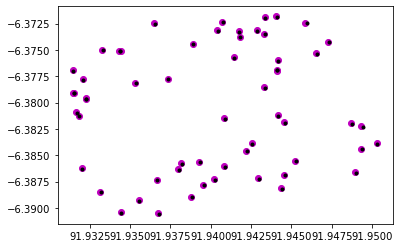

In [34]:
plt.plot(
    np.degrees(matches2['RA']), 
    np.degrees(matches2['DEC']), 
#     xerr=matches2['JAPERMAG3ERR'], 
#     yerr=matched2['e_F160W'], 
    'k.')

plt.plot(
    (matched2['RAJ2000']), 
    (matched2['DEJ2000']), 
#     xerr=matches2['JAPERMAG3ERR'], 
#     yerr=matched2['e_F160W'], 
    'mo', zorder=-1)

(91.93051666666666, 91.95123333333332) (-6.391729166666666, -6.370798611111111)


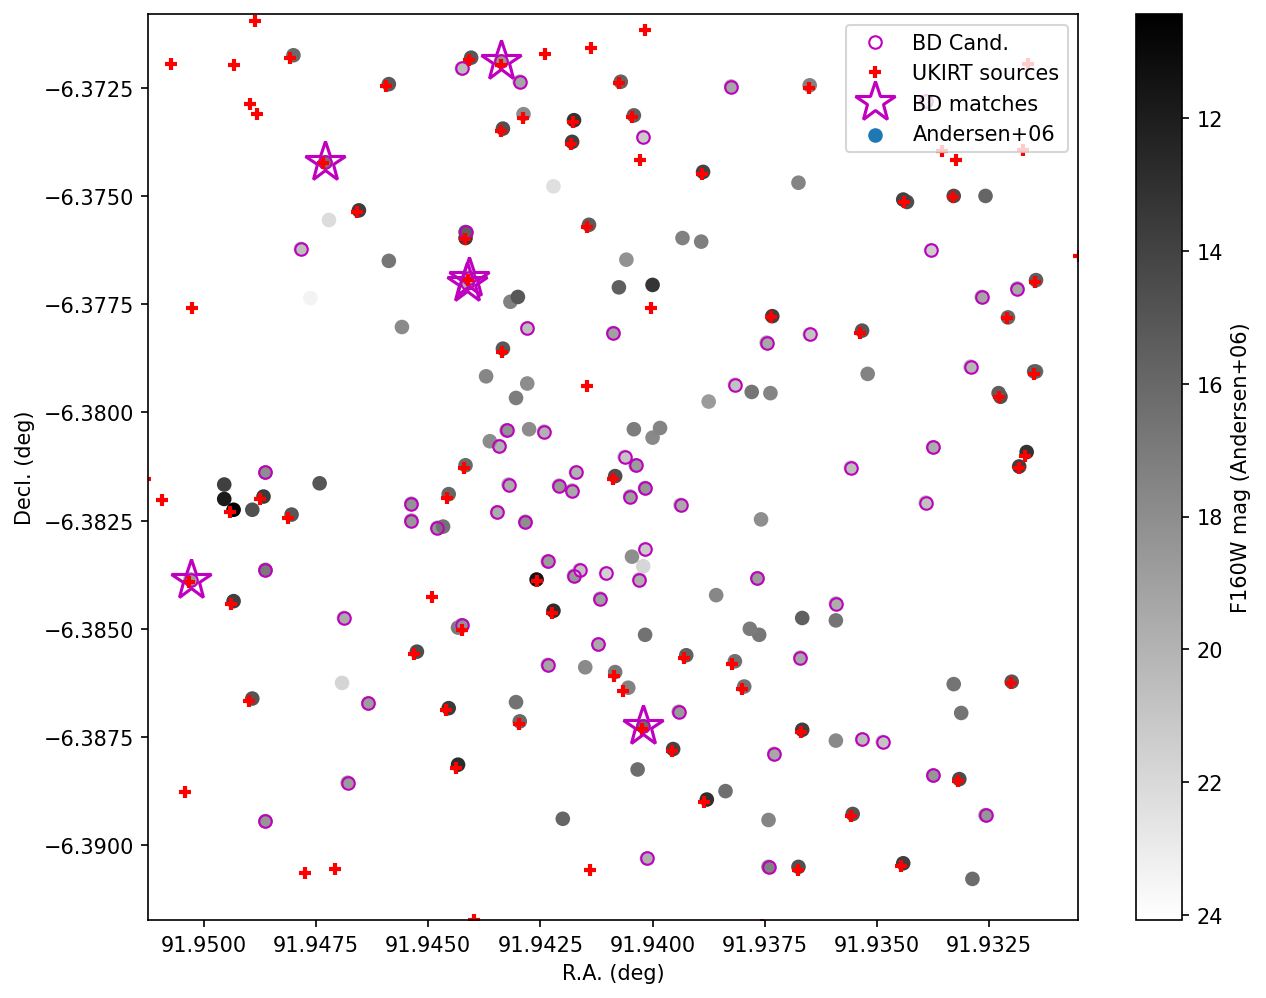

In [35]:
fig, ax = plt.subplots(1, figsize=(10,8), dpi=150)

plt.scatter(
    monr2_published_table['RAJ2000'],
    monr2_published_table['DEJ2000'],
    c=monr2_published_table['F160W'],
    cmap='gray',
    label='Andersen+06'
)
cbar = plt.colorbar()
cbar.set_label("F160W mag (Andersen+06)")
cbar.ax.invert_yaxis()

plt.plot(
    monr2_published_table['RAJ2000'][bds],
    monr2_published_table['DEJ2000'][bds],
    'o',
    mec='m',
    mfc='None',
    label='BD Cand.'
)

print(plt.xlim(), plt.ylim())

plt.plot(
    np.degrees(w11m['RA']),
    np.degrees(w11m['DEC']),
    'r+',
    mew=2,
    label='UKIRT sources'
)

plt.plot(
    matched_bds['RAJ2000'],
    matched_bds['DEJ2000'],
    'm*',
    ms=20,
    mew=1.5,
    mfc='None',
    label='BD matches'
)


plt.xlim((91.93051666666666, 91.95123333333332)[::-1])
plt.ylim(-6.391729166666666, -6.370798611111111)

plt.xlabel("R.A. (deg)")
plt.ylabel("Decl. (deg)")

plt.legend()

In [36]:
#sid = 45195940866214
sid = 45195940889196

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


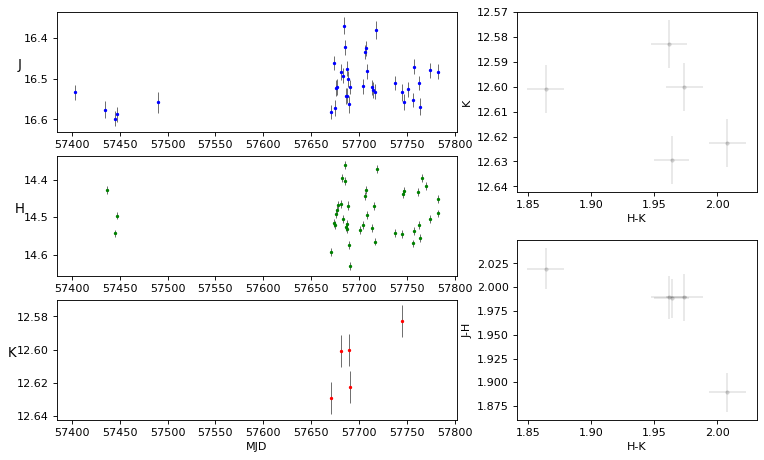

In [37]:
fig_lc = simple_lc(dat, sid)


0 Andersen index #22 is 45195940889196.
 Match: 0.23 arcsec
 Published mags: F160W=16.3, F207M=15.7
 Measured mags:  H=14.5, K=12.6
 Stetson variability index:  S=7.79
 


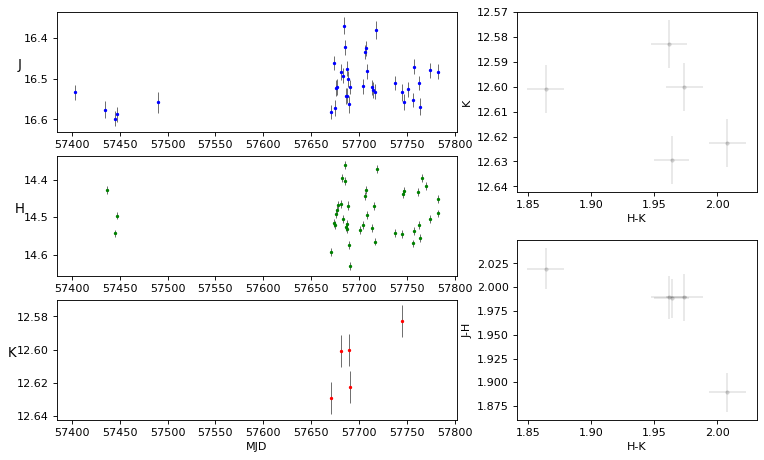

1 Andersen index #55 is 45195940889188.
 Match: 0.22 arcsec
 Published mags: F160W=18.6, F207M=16.1
 Measured mags:  H=14.5, K=12.6
 Stetson variability index:  S=33.12
 


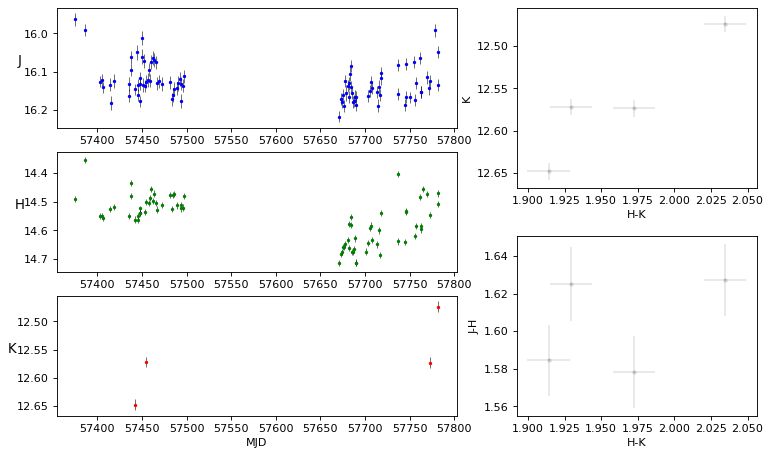

2 Andersen index #137 is 45195940889176.
 Match: 0.21 arcsec
 Published mags: F160W=19.7, F207M=18.0
 Measured mags:  H=12.7, K=9.9
 Stetson variability index:  S=3.42
 


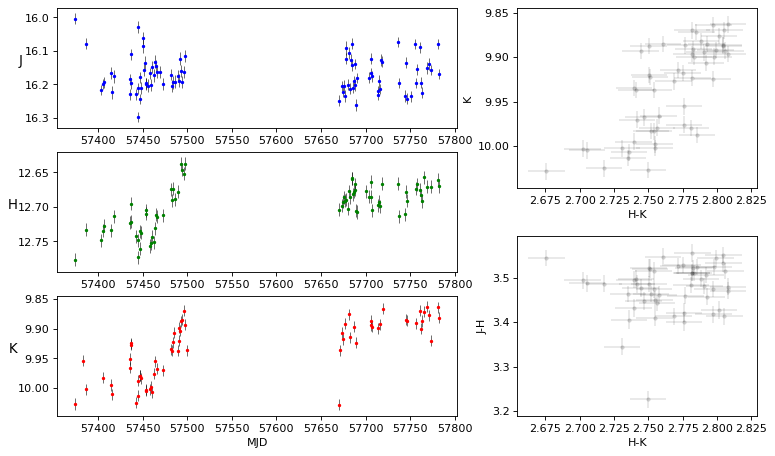

3 Andersen index #141 is 45195940889176.
 Match: 0.23 arcsec
 Published mags: F160W=20.0, F207M=18.4
 Measured mags:  H=12.7, K=9.9
 Stetson variability index:  S=3.42
 


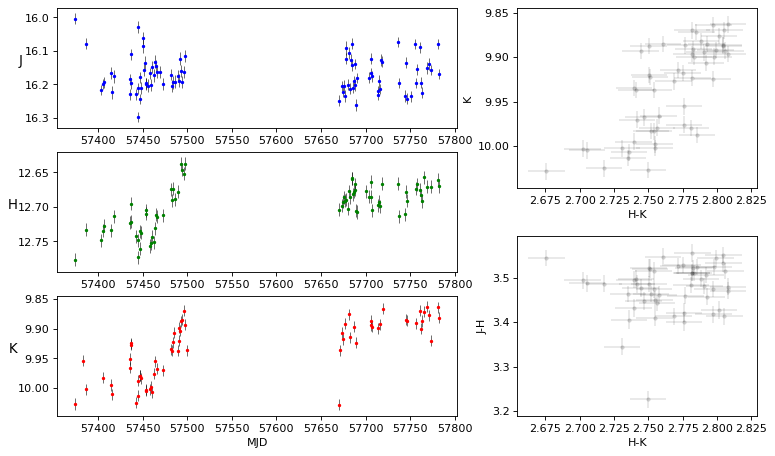

4 Andersen index #160 is 45195940866214.
 Match: 0.23 arcsec
 Published mags: F160W=16.7, F207M=16.2
 Measured mags:  H=16.5, K=nan
 Stetson variability index:  S=nan
 


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


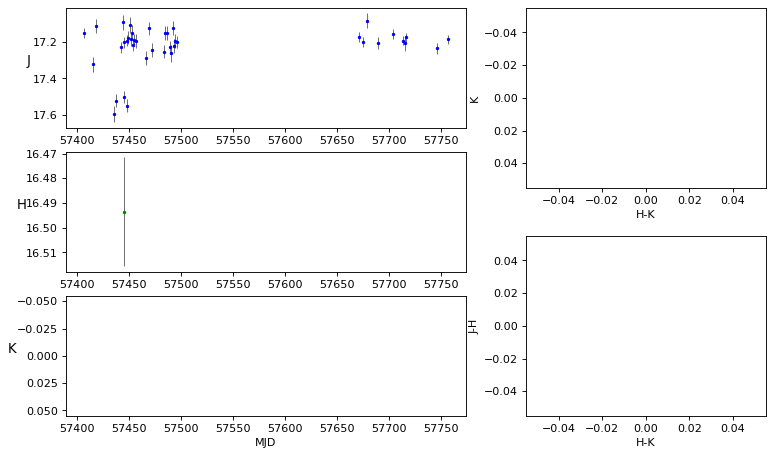

5 Andersen index #180 is 45195940867360.
 Match: 0.28 arcsec
 Published mags: F160W=18.5, F207M=16.3
 Measured mags:  H=nan, K=nan
 Stetson variability index:  S=nan
 


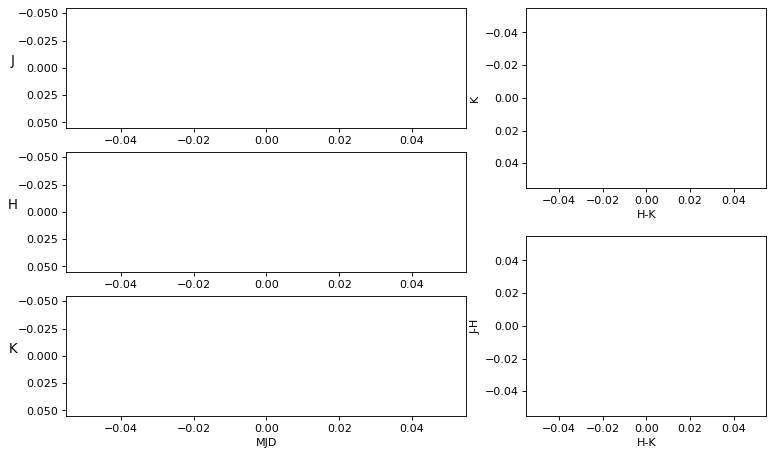

In [38]:
bd_match_sids = matches.index

for i, sid in enumerate(bd_match_sids):
    
    print(f"{i} Andersen index #{matched_bds['__AMO2006_'][i]} is {sid}.")
    print(f" Match: {d2d[sep_constraint][i].to(u.arcsec):.2f}")
    print(f" Published mags: F160W={matched_bds['F160W'][i]:.1f}, F207M={matched_bds['F207M'][i]:.1f}")
    print(f" Measured mags:  H={matches['HAPERMAG3'].values[i]:.1f}, K={matches['KAPERMAG3'].values[i]:.1f}")
    print(f" Stetson variability index:  S={spread['variability']['Stetson_JHK'].values[idx[sep_constraint][i]]:.2f}")
    print(" ")

    fig_lc = simple_lc(dat, sid)
#     fig_lc.ax_j.set_title(f"{i} S-{table3['SONYC'][i]}. $S = {spread.wserv7['variability']['Stetson_JHK'].values[idx3[i]]:.2f}$")
    plt.show()

Int64Index([45195940889188, 45195940889176, 45195940889176, 45195940866214,
            45195940867360],
           dtype='int64', name='SOURCEID')

In [39]:
matched_bds

__AMO2006_,RAJ2000,DEJ2000,F110W,e_F110W,F160W,e_F160W,F165M,e_F165M,F207M,e_F207M,_2MASS,Av,mass
,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,,,
int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,bytes17,float64,float64
22,91.94021,-6.38725,18.46,0.04,16.29,0.040,16.06,0.04,15.71,0.07,,8.14569,0.0963702
55,91.95029,-6.38386,23.92,0.81,18.65,0.040,18.34,0.04,16.13,0.05,06074807-0623017,-287.151,0.006
137,91.94412,-6.37700,22.06,0.12,19.68,0.100,19.47,0.11,18.05,0.12,,6.68467,0.012
141,91.94408,-6.37689,22.16,0.14,20.05,0.080,19.76,0.08,18.40,0.08,06074658-0622370,3.36544,0.006
160,91.94729,-6.37422,18.33,0.04,16.67,0.040,16.43,0.04,16.25,0.07,,1.18286,0.04
180,91.94337,-6.37189,23.79,0.76,18.48,0.050,18.27,0.05,16.28,0.07,,-284.166,0.006
